

```
Nama : Muhamad Syabaini
Submission Machine Learning```



# import librry dan fetch dataset dari server

In [ ]:
# import tensorflow
import tensorflow as tf

In [ ]:
# print tensorflow version
print(tf.__version__)

2.5.0


In [ ]:
# download dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-03 16:45:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.97MB/s    in 57s     

2021-07-03 16:46:09 (5.41 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#ekstrak dataset
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi di atas 97%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

# Split folder dan membuat directori

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/hasil_split", seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3532.27 files/s]


In [ ]:
base_dir = '/tmp/rockpaperscissors/hasil_split/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
import os
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)

In [ ]:
os.listdir('/tmp/rockpaperscissors/hasil_split/val')
os.listdir('/tmp/rockpaperscissors/hasil_split/train')

['paper', 'scissors', 'rock']

# augmentation and generate image data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

# See summary of model
model.summary()
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 36992)            

In [ ]:
# latih model dengan model.fit 
history = model.fit(
    train_generator,
    steps_per_epoch = 41,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose =2,
    callbacks=[callbacks])

Epoch 1/20
41/41 - 77s - loss: 1.0341 - accuracy: 0.4779 - val_loss: 0.7228 - val_accuracy: 0.7685
Epoch 2/20
41/41 - 75s - loss: 0.4838 - accuracy: 0.8216 - val_loss: 0.3378 - val_accuracy: 0.8715
Epoch 3/20
41/41 - 76s - loss: 0.2570 - accuracy: 0.9062 - val_loss: 0.1952 - val_accuracy: 0.9433
Epoch 4/20
41/41 - 75s - loss: 0.2267 - accuracy: 0.9207 - val_loss: 0.1898 - val_accuracy: 0.9410
Epoch 5/20
41/41 - 75s - loss: 0.1828 - accuracy: 0.9299 - val_loss: 0.2729 - val_accuracy: 0.9074
Epoch 6/20
41/41 - 75s - loss: 0.1336 - accuracy: 0.9543 - val_loss: 0.1908 - val_accuracy: 0.9398
Epoch 7/20
41/41 - 75s - loss: 0.1255 - accuracy: 0.9558 - val_loss: 0.1231 - val_accuracy: 0.9514
Epoch 8/20
41/41 - 78s - loss: 0.1070 - accuracy: 0.9634 - val_loss: 0.1187 - val_accuracy: 0.9618
Epoch 9/20
41/41 - 75s - loss: 0.1103 - accuracy: 0.9665 - val_loss: 0.1130 - val_accuracy: 0.9641
Epoch 10/20
41/41 - 75s - loss: 0.0767 - accuracy: 0.9733 - val_loss: 0.1005 - val_accuracy: 0.9641

Akurasi 

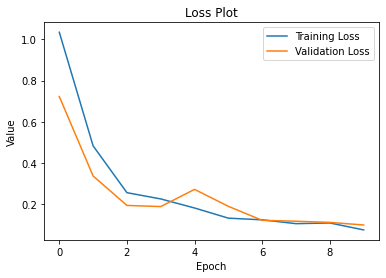

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

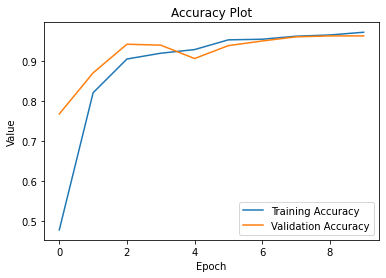

In [ ]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving cLvjnABO9kFuwjP0.png to cLvjnABO9kFuwjP0.png
SCISSORS


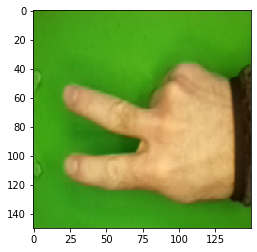

In [295]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  else:
    print('SCISSORS')